In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
df=pd.read_csv('customer_booking.csv', sep=',', encoding='ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [17]:
df.shape

(50000, 14)

In [9]:
df.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [10]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [11]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [33]:
y=df.booking_complete
X=df.drop('booking_complete', axis=1)

In [34]:
X.head(15)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52


In [35]:
for col in X.select_dtypes(include=['object']).columns:
    # X[col]=X[col].astype('category').cat.codes
    X[col], _=X[col].factorize()

In [65]:
from sklearn.feature_selection import SelectKBest,mutual_info_classif

selector=SelectKBest(mutual_info_classif, k=6)
selector.fit(X,y)

X.columns[selector.get_support()]

Index(['length_of_stay', 'route', 'booking_origin', 'wants_extra_baggage',
       'wants_preferred_seat', 'flight_duration'],
      dtype='object')

In [66]:
mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

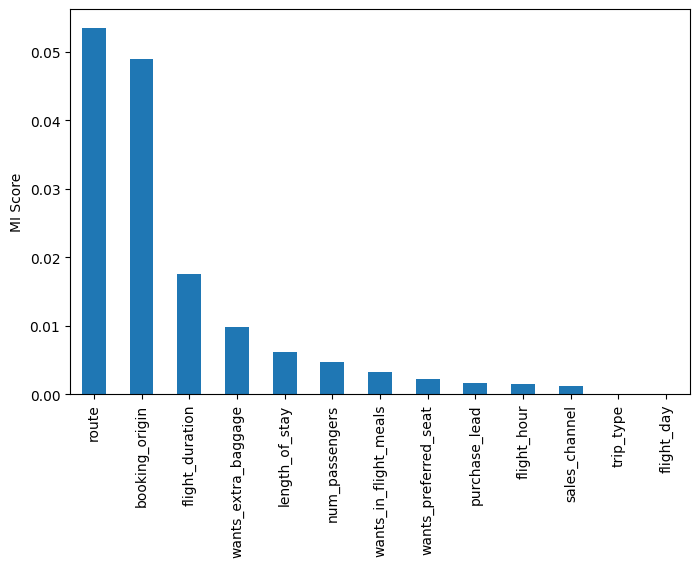

In [67]:
plt.figure(dpi=100, figsize=(8, 5))
mi_scores.plot(kind='bar')
plt.ylabel('MI Score')
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:

from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
# from sklearn.model_selection import cross_val_score

In [71]:
# Using RandomForestClassifier with all features
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
train_pred=model.predict(X_train)
y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_train,train_pred), accuracy_score(y_train,train_pred))
print(roc_auc_score(y_test, y_pred), accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      8520
           1       0.55      0.11      0.18      1480

    accuracy                           0.85     10000
   macro avg       0.71      0.55      0.55     10000
weighted avg       0.82      0.85      0.81     10000

0.9994998332777593 0.99985
0.5454701180053292 0.8548


In [72]:
# Using RandomForestClassifier with selected features
model=RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train[X.columns[selector.get_support()]], y_train)
train_pred=model.predict(X_train[X.columns[selector.get_support()]])
y_pred=model.predict(X_test[X.columns[selector.get_support()]])
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_train,train_pred), accuracy_score(y_train,train_pred))
print(roc_auc_score(y_test, y_pred), accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91      8520
           1       0.40      0.22      0.28      1480

    accuracy                           0.84     10000
   macro avg       0.64      0.58      0.59     10000
weighted avg       0.80      0.84      0.81     10000

0.7794107260701119 0.92005
0.5803070676310114 0.8352
